The Following code is for loading the model that is saved

In [ ]:
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

This is all the imports that will be done 

In [1]:
import kagglehub
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import random
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import torch.nn as nn

C:\Users\raksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version of the public dataset
path = kagglehub.dataset_download("alexteboul/english-premier-league-logo-detection-20k-images")

print("Path to dataset files:", path)

# Define the base directory for logos (adjusted for nested epl-logos-big)
epl_logos_dir = os.path.join(path, "epl-logos-big", "epl-logos-big")
print(f'Location of the dataset: {epl_logos_dir}')
# Check if the epl-logos-big/epl-logos-big directory exists
if not os.path.exists(epl_logos_dir):
    print(f"Error: Directory {epl_logos_dir} not found.")
    print("Contents of dataset root:", os.listdir(path))
    print("Contents of epl-logos-big:", os.listdir(os.path.join(path, "epl-logos-big")))
    raise FileNotFoundError("epl-logos-big/epl-logos-big directory not found.")

# Print contents of epl-logos-big/epl-logos-big for debugging
print("Contents of epl-logos-big/epl-logos-big:", os.listdir(epl_logos_dir))

# Get list of club directories
club_dirs = [d for d in os.listdir(epl_logos_dir) if os.path.isdir(os.path.join(epl_logos_dir, d))]
if not club_dirs:
    print(f"Error: No club directories found in {epl_logos_dir}.")
    raise FileNotFoundError("No club directories found.")

# Dictionary to store image paths per club
global club_image_paths
club_image_paths = {}

# Iterate through each club directory and find image files
for club in club_dirs:
    club_path = os.path.join(epl_logos_dir, club)
    # Find all image files (.png and .jpg)
    image_files = glob.glob(os.path.join(club_path, "*.png")) + glob.glob(os.path.join(club_path, "*.jpg"))
    if image_files:
        club_image_paths[club] = image_files
    else:
        print(f"Warning: No .png or .jpg images found in {club_path}")
        print(f"Contents of {club} directory:", os.listdir(club_path))

print("Found clubs:", list(club_image_paths.keys()))

Path to dataset files: C:\Users\raksh\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4
Location of the dataset: C:\Users\raksh\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big
Contents of epl-logos-big/epl-logos-big: ['arsenal', 'aston-villa', 'brentford', 'brighton', 'burnley', 'chelsea', 'crystal-palace', 'everton', 'leeds', 'leicester-city', 'liverpool', 'manchester-city', 'manchester-united', 'newcastle', 'norwich', 'southampton', 'tottenham', 'watford', 'west-ham', 'wolves']
Found clubs: ['arsenal', 'aston-villa', 'brentford', 'brighton', 'burnley', 'chelsea', 'crystal-palace', 'everton', 'leeds', 'leicester-city', 'liverpool', 'manchester-city', 'manchester-united', 'newcastle', 'norwich', 'southampton', 'tottenham', 'watford', 'west-ham', 'wolves']


Displaying arsenal image: C:\Users\raksh\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big\arsenal\133079dd-7895-4722-871a-fe04acc5fe7d.png (140x140 pixels)
Displaying aston-villa image: C:\Users\raksh\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big\aston-villa\59114635-bd11-4081-8a34-7c2ed47fa361.png (140x140 pixels)
Displaying brentford image: C:\Users\raksh\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big\brentford\dc3c39c5-b7a4-400f-99d4-d48d76015d76.png (140x140 pixels)
Displaying brighton image: C:\Users\raksh\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big\brighton\4b90fcd2-8d56-4898-bf7d-996cededce27.png (140x140 pixels)
Displaying burnley image: C:\Users\raksh\.cache\kagglehub\

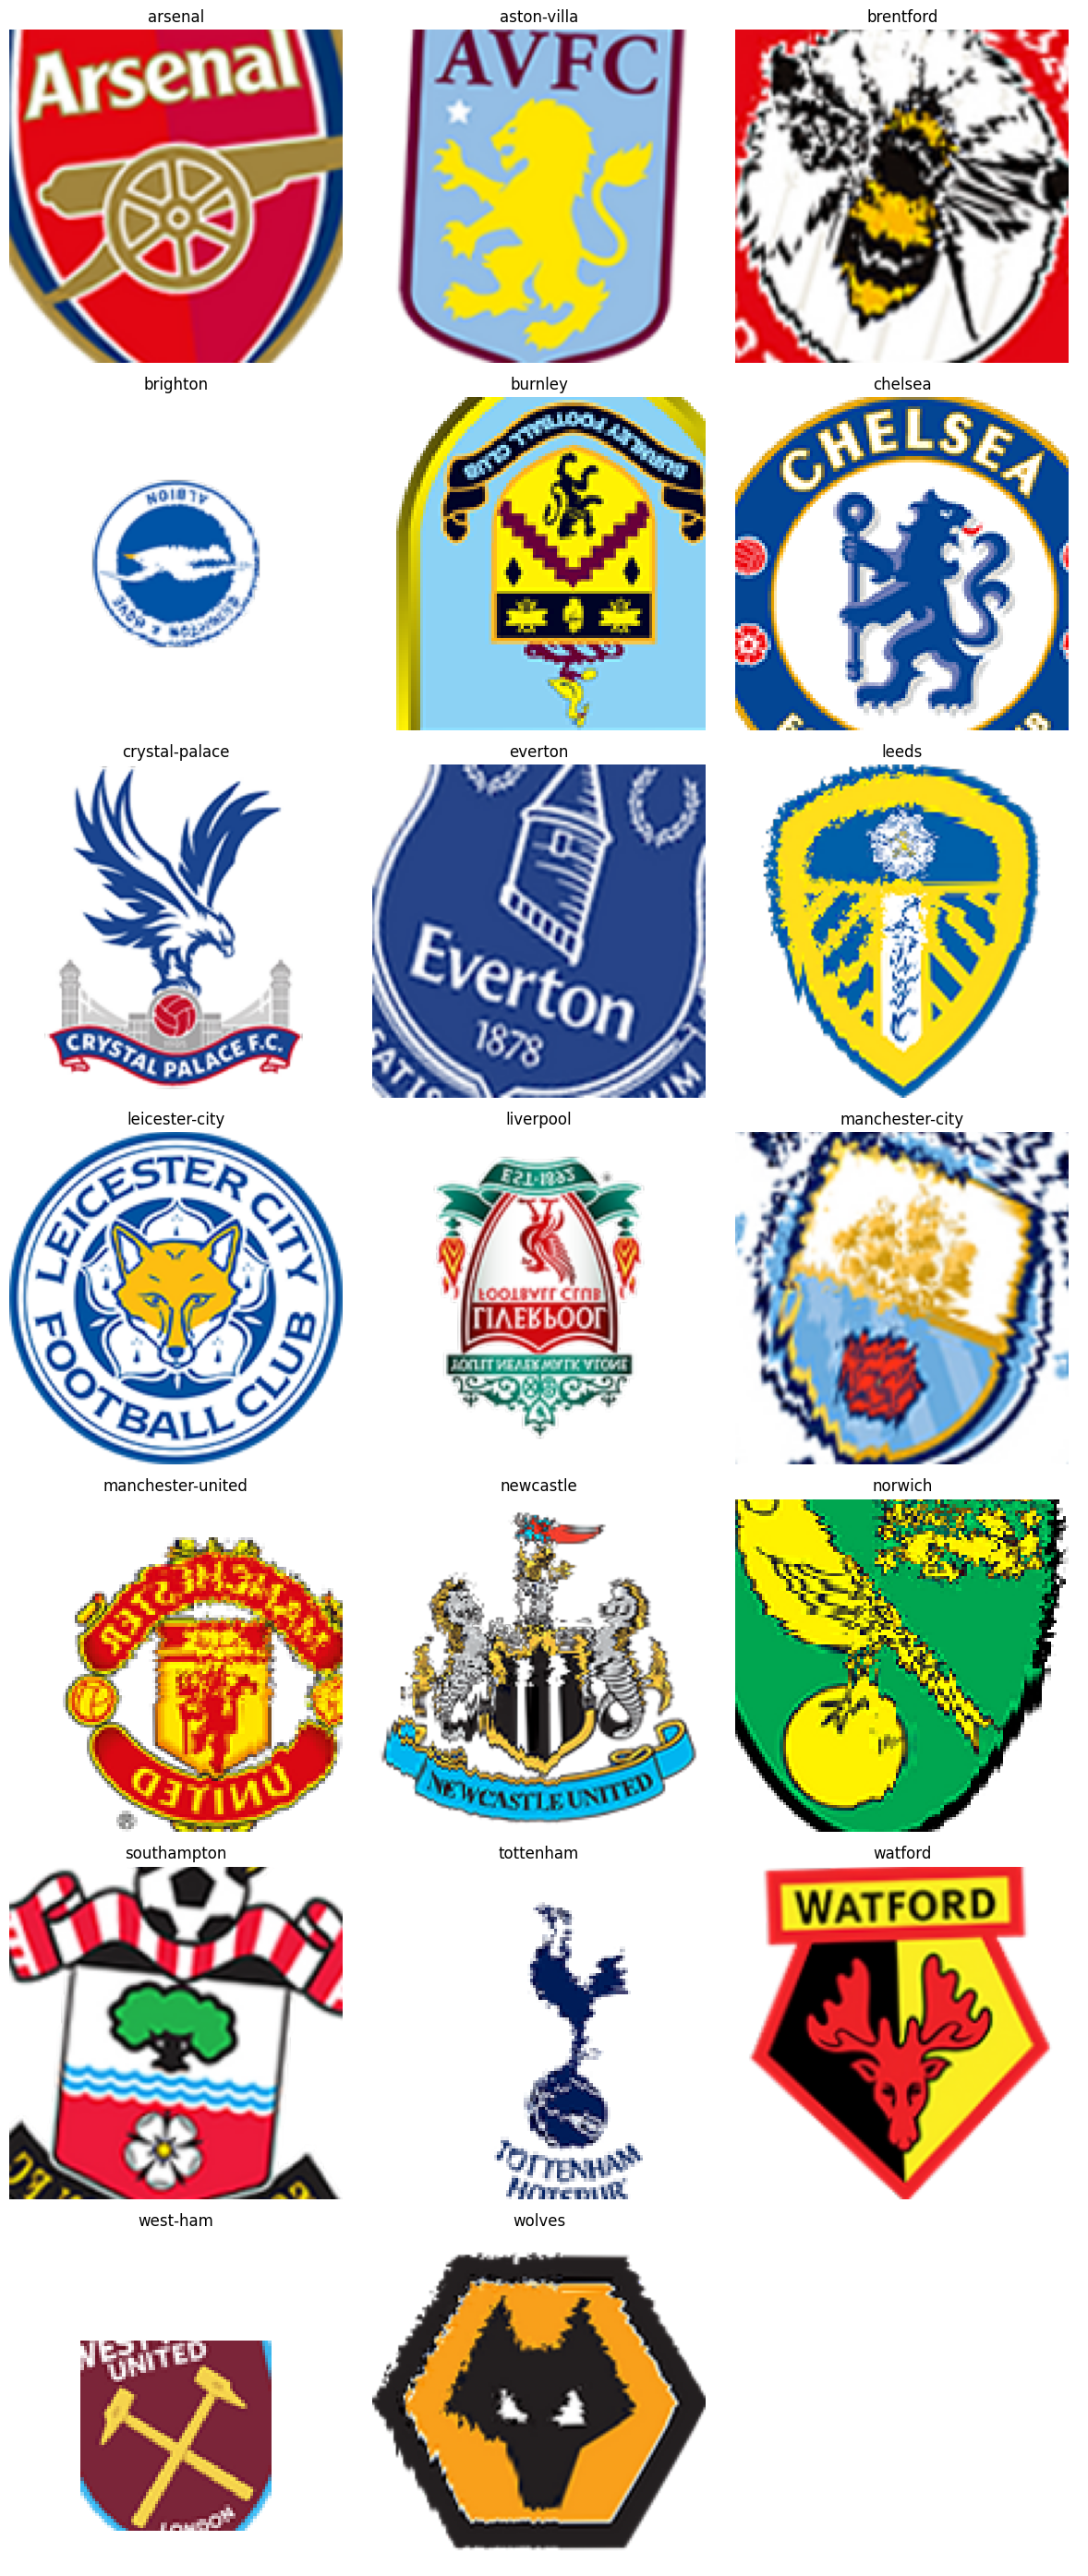

In [3]:


# Check if club_image_paths exists (from Cell 1)
try:
    if not club_image_paths:
        raise NameError("club_image_paths is empty or not defined.")
except NameError:
    print("Error: club_image_paths not found. Please run Cell 1 first.")
    raise

# Set up the plot
num_clubs = len(club_image_paths)
cols = 3  # Number of columns for the grid
rows = (num_clubs + cols - 1) // cols  # Calculate rows needed
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Iterate through clubs and display one random image
for idx, (club, image_paths) in enumerate(club_image_paths.items()):
    if image_paths:  # Ensure there are images for the club
        # Select a random image
        img_path = random.choice(image_paths)
        try:
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].set_title(club)
            axes[idx].axis("off")
            print(f"Displaying {club} image: {img_path} ({img.size[0]}x{img.size[1]} pixels)")
        except Exception as e:
            print(f"Error displaying image for {club}: {e}")
            axes[idx].set_title(f"{club} (Error)")
            axes[idx].axis("off")
    else:
        axes[idx].set_title(f"{club} (No images)")
        axes[idx].axis("off")

# Hide empty subplots
for idx in range(len(club_image_paths), len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

In [4]:

# Set seed for reproducibility
torch.manual_seed(1234)

# Define dataset path
base_dir = epl_logos_dir

# === Full Preprocessing: ===  #
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    # Geometric transformations
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    # Color and intensity transformations
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomGrayscale(p=0.2),
    # Crop to final size
    transforms.RandomCrop((224, 224)),
    transforms.ToTensor(),
    # Occlusion
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3), value=0),
    # Normalization 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # Random operation
])


# Load dataset WITH normalization
dataset = datasets.ImageFolder(
    root=base_dir,
    transform=transform
)

In [5]:
from torch.utils.data import random_split, DataLoader

total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size #AKA remaining 15% :)

print(f"Total Size: {total_size} \nTrain Size: {train_size} \nValidation Size: {val_size} \nTest size: {test_size}")

Total Size: 20000 
Train Size: 14000 
Validation Size: 3000 
Test size: 3000


In [6]:
#splitting the data 
train_dataset, val_dataset, test_dataset = random_split(dataset,[train_size,val_size,test_size])

#dataloaders
train_loader = DataLoader(
    train_dataset, 
    batch_size = 32, 
    shuffle=True,
    num_workers = 2, 
    pin_memory = True)

val_loader = DataLoader(
    val_dataset,
    batch_size = 32,
    shuffle = True,
    num_workers = 2,
    pin_memory = True
)

test_loader = DataLoader(
    test_dataset, 
    batch_size = 32,
    shuffle = True,
    num_workers = 2,
    pin_memory = True
)

#Inspection time (HAHAHAHAHAHAHAHAHAHAHA)
images,labels = next(iter(train_loader))
print(f"Train batch shape:{images.shape}, Labels: {labels[:5]}")

images,labels = next(iter(val_loader))
print(f"validation batch shape: {images.shape}, Labels: {labels[:5]}")

images,labels = next(iter(test_loader))
print(f"Test batch shape: {images.shape}, Labels: {labels[:5]}")

Train batch shape:torch.Size([32, 3, 224, 224]), Labels: tensor([ 9, 17, 14, 17,  1])
validation batch shape: torch.Size([32, 3, 224, 224]), Labels: tensor([11,  0,  0, 16,  4])
Test batch shape: torch.Size([32, 3, 224, 224]), Labels: tensor([ 0,  5, 11, 14, 16])


In [7]:


model = nn.Sequential(
    # Conv1: 3 input channels (RGB) → 32 output channels, 3x3 kernel, padding=1
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # Output: 224x224x32
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 112x112x32
    # Conv2: 32 input channels → 64 output channels
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # Output: 112x112x64
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 56x56x64
    # Conv3: 64 input channels → 128 output channels
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),# Output: 56x56x128
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 28x28x128
    # Flatten
    nn.Flatten(),                                          # Output: 28x28x128 = 100352
    # Dense layers
    nn.Linear(100352, 128),                                # Output: 128
    nn.ReLU(),
    nn.Dropout(0.5),                                       # Prevent overfitting
    nn.Linear(128, len(dataset.classes))                   # Output: 20 classes
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Device used to train: {device}")

# Inspect model
print(model)

# Test with one batch
images, labels = next(iter(train_loader))
images = images.to(device)
outputs = model(images)
print(f"Output shape: {outputs.shape}")

Device used to train: cuda
Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=100352, out_features=128, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=128, out_features=20, bias=True)
)
Output shape: torch.Size([32, 20])


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [10]:
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for images,labels in train_loader:
        images,labels = images.to(device) , labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _,predicted = torch.max(outputs,1)
        train_total += labels.size(0)
        train_correct += (predicted ==labels).sum().item()

    train_loss /= len(train_loader)
    train_accuracy = 100 * train_correct / train_total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    #validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images,labels in val_loader:
            images,labels = images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs,labels)
            val_loss += loss.item()
            _,predicted = torch.max(outputs,1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()


    val_loss /= len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

Epoch 1/15, Train Loss: 1.9976, Train Acc: 38.00%, Val Loss: 1.0656, Val Acc: 67.73%
Epoch 2/15, Train Loss: 1.1059, Train Acc: 64.30%, Val Loss: 0.5845, Val Acc: 81.97%
Epoch 3/15, Train Loss: 0.7875, Train Acc: 74.69%, Val Loss: 0.3941, Val Acc: 88.87%
Epoch 4/15, Train Loss: 0.6169, Train Acc: 80.18%, Val Loss: 0.3015, Val Acc: 90.47%
Epoch 5/15, Train Loss: 0.5310, Train Acc: 82.74%, Val Loss: 0.2704, Val Acc: 92.17%
Epoch 6/15, Train Loss: 0.4703, Train Acc: 85.05%, Val Loss: 0.2386, Val Acc: 93.13%
Epoch 7/15, Train Loss: 0.4399, Train Acc: 85.89%, Val Loss: 0.2029, Val Acc: 93.57%
Epoch 8/15, Train Loss: 0.4069, Train Acc: 86.88%, Val Loss: 0.2107, Val Acc: 93.50%
Epoch 9/15, Train Loss: 0.3734, Train Acc: 88.19%, Val Loss: 0.2016, Val Acc: 94.50%
Epoch 10/15, Train Loss: 0.3392, Train Acc: 89.13%, Val Loss: 0.1723, Val Acc: 94.67%
Epoch 11/15, Train Loss: 0.3403, Train Acc: 89.24%, Val Loss: 0.1559, Val Acc: 95.43%
Epoch 12/15, Train Loss: 0.3137, Train Acc: 90.11%, Val Loss: 0

In [11]:
# Test phase (after training)
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = 100 * test_correct / test_total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.1209, Test Accuracy: 96.30%


In [12]:
torch.save(model.state_dict(), "epl_logo_cnn.pth")
print("Model saved to epl_logo_cnn.pth")

Model saved to epl_logo_cnn.pth


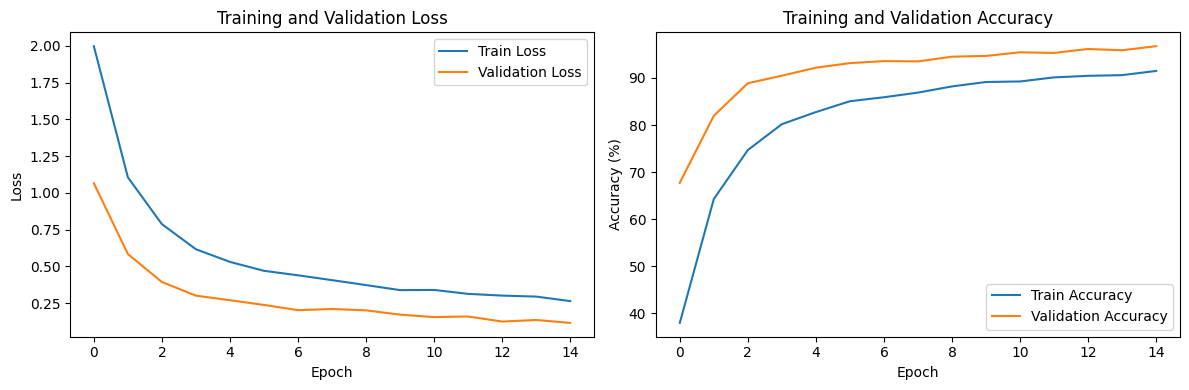

In [13]:
# Plotting training progress
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()